In [60]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
from sklearn.pipeline import make_pipeline

In [61]:
data = pd.read_csv('dataset/dataset.csv')
data

,Text,language
0,klement gottwaldi surnukeha palsameeriti ning ...,Estonian
1,sebes joseph pereira thomas på eng the jesuit...,Swedish
2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...,Thai
3,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...,Tamil
4,de spons behoort tot het geslacht haliclona en...,Dutch
...,...,...
21995,hors du terrain les années et sont des année...,French
21996,ใน พศ หลักจากที่เสด็จประพาสแหลมมลายู ชวา อินเ...,Thai
21997,con motivo de la celebración del septuagésimoq...,Spanish
21998,年月，當時還只有歲的她在美國出道，以mai-k名義推出首張英文《baby i like》，由...,Chinese


In [62]:
change_names = {
    'Text': 'texto',
    'language': 'lingua'
}

data = data.rename(columns=change_names)
data.head()

,texto,lingua
0,klement gottwaldi surnukeha palsameeriti ning ...,Estonian
1,sebes joseph pereira thomas på eng the jesuit...,Swedish
2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...,Thai
3,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...,Tamil
4,de spons behoort tot het geslacht haliclona en...,Dutch


In [63]:
# Dropar os valores de determinadas linguas
data = data[data['lingua'] != 'Japanese']
data = data[data['lingua'] != 'Chinese']


In [64]:
contagem_idiomas = data['lingua'].value_counts()

print(contagem_idiomas)


Estonian      1000
Swedish       1000
English       1000
Russian       1000
Romanian      1000
Persian       1000
Pushto        1000
Spanish       1000
Hindi         1000
Korean        1000
French        1000
Portugese     1000
Indonesian    1000
Urdu          1000
Latin         1000
Turkish       1000
Dutch         1000
Tamil         1000
Thai          1000
Arabic        1000
Name: lingua, dtype: int64


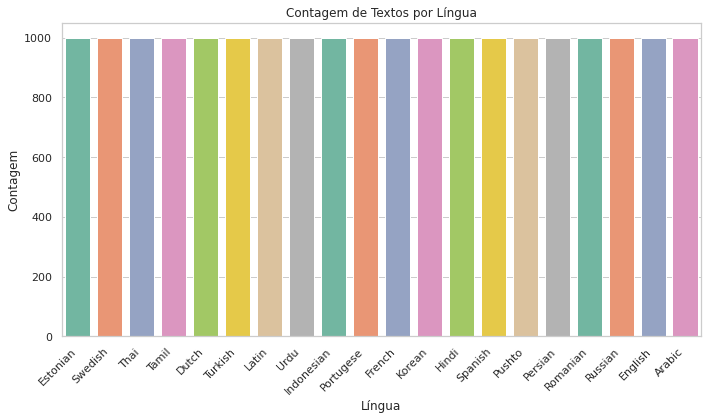

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configurações estéticas
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))  # Ajusta o tamanho da figura

# Plotagem do gráfico de contagem
sns.countplot(data=data, x="lingua", palette="Set2")  # Utiliza a paleta de cores Set2

# Adiciona rótulos aos eixos
plt.xlabel("Língua")
plt.ylabel("Contagem")
plt.title("Contagem de Textos por Língua")

# Rotaciona os rótulos no eixo x para melhorar a legibilidade
plt.xticks(rotation=45, ha='right')

# Exibe o gráfico
plt.tight_layout()  # Ajusta o layout para evitar sobreposição de elementos
plt.show()


In [66]:
# Divisão dos dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(data['texto'], data['lingua'], test_size=0.2, random_state=42)

In [67]:
#Criar um pipeline que primeiro vetoriza o texto e depois aplica Naive Bayes
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [68]:
# Treinar o modelo
model.fit(X_train, y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [69]:
# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

In [70]:
# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

"/content/dataset_sentimentos.csv", accuracy, report

('/content/dataset_sentimentos.csv',
 0.98075,
 '              precision    recall  f1-score   support\n\n      Arabic       1.00      0.99      1.00       213\n       Dutch       0.99      0.97      0.98       192\n     English       0.75      1.00      0.86       184\n    Estonian       1.00      0.96      0.98       211\n      French       0.96      1.00      0.98       212\n       Hindi       1.00      0.98      0.99       209\n  Indonesian       1.00      0.98      0.99       205\n      Korean       1.00      0.99      1.00       176\n       Latin       0.98      0.94      0.96       200\n     Persian       1.00      0.99      1.00       189\n   Portugese       0.99      0.94      0.97       202\n      Pushto       1.00      0.97      0.98       206\n    Romanian       1.00      1.00      1.00       204\n     Russian       0.99      0.99      0.99       202\n     Spanish       1.00      0.97      0.99       191\n     Swedish       1.00      1.00      1.00       195\n       Tamil  

In [71]:
print(accuracy_score(y_test,y_pred))

0.98075


In [72]:
cv_scores = cross_val_score(model, X_train, y_train, cv=10)  # 10-fold cross-validation

print("Accuracy scores for each fold:", cv_scores)
print("Mean accuracy:", cv_scores.mean())

Accuracy scores for each fold: [0.980625 0.975625 0.981875 0.978125 0.98125  0.983125 0.98125  0.9775
 0.981875 0.98125 ]
Mean accuracy: 0.9802499999999998


In [73]:
# Função para prever a língua de um texto dado
def prever_lingua(texto):
    lingua_predita = model.predict([texto])[0]
    print(f"O texto '{texto}' está escrito em {lingua_predita}.")
    


In [74]:

# Teste em Estonian
(prever_lingua("klement gottwaldi surnukeha palsameeriti ning ...")) 

# Teste em Swedish
(prever_lingua("sebes joseph pereira thomas på eng the jesuit...")) 

# Teste em English
(prever_lingua("This is a test sentence.")) 

# Teste em Russian
(prever_lingua("Это тестовое предложение."))  

# Teste em Romanian
(prever_lingua("Aceasta este o propoziție de test.")) 

# Teste em Persian
(prever_lingua("این یک جمله آزمایشی است.")) 

# Teste em Pushto
(prever_lingua("دا امتحاني جمله ده.")) 

# Teste em Spanish
(prever_lingua("Esta es una oración de prueba.")) 

# Teste em Hindi
(prever_lingua("यह एक परीक्षण वाक्य है।")) 

# Teste em Korean
(prever_lingua("한국에서 성씨가 사용되기 시작한 정확한 시기는 알 수 없으나 한자漢字 등 중국 문물이 수입...")) 

# Teste em French
(prever_lingua("Ceci est une phrase de test.")) 

# Teste em Portuguese
(prever_lingua("Esta é uma frase de teste.")) 

# Teste em Indonesian
(prever_lingua("Ini adalah kalimat uji coba.")) 

# Teste em Urdu
(prever_lingua("یہ ایک ٹیسٹ جملہ ہے۔")) 

# Teste em Latin
(prever_lingua("Lorem ipsum dolor sit amet."))

# Teste em Turkish
(prever_lingua("Bu bir test cümlesi."))

# Teste em Dutch
(prever_lingua("Dit is een testzin."))

# Teste em Tamil
(prever_lingua("இது ஒரு சோதனை வாக்குத்தத்தில் உள்ளது."))

# Teste em Thai
(prever_lingua("นี่คือประโยคทดสอบ"))

# Teste em Arabic
(prever_lingua("هذه جملة اختبار."))


O texto 'klement gottwaldi surnukeha palsameeriti ning ...' está escrito em Estonian.
O texto 'sebes joseph pereira thomas på eng the jesuit...' está escrito em Swedish.
O texto 'This is a test sentence.' está escrito em English.
O texto 'Это тестовое предложение.' está escrito em Russian.
O texto 'Aceasta este o propoziție de test.' está escrito em Romanian.
O texto 'این یک جمله آزمایشی است.' está escrito em Persian.
O texto 'دا امتحاني جمله ده.' está escrito em Pushto.
O texto 'Esta es una oración de prueba.' está escrito em Spanish.
O texto 'यह एक परीक्षण वाक्य है।' está escrito em Hindi.
O texto '한국에서 성씨가 사용되기 시작한 정확한 시기는 알 수 없으나 한자漢字 등 중국 문물이 수입...' está escrito em Korean.
O texto 'Ceci est une phrase de test.' está escrito em French.
O texto 'Esta é uma frase de teste.' está escrito em Portugese.
O texto 'Ini adalah kalimat uji coba.' está escrito em Indonesian.
O texto 'یہ ایک ٹیسٹ جملہ ہے۔' está escrito em Urdu.
O texto 'Lorem ipsum dolor sit amet.' está escrito em Latin.
O tex

In [75]:
import joblib

# Nome do arquivo para salvar o modelo
filename = 'modelo_linguagem.joblib'

# Salvar o modelo utilizando joblib
joblib.dump(model, filename)

print(f"Modelo salvo como {filename}")


Modelo salvo como modelo_linguagem.joblib
